# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
# importing all libraries
import numpy as np
import pandas as pd 

In [2]:

df = pd.read_csv("/content/ionosphere_data.csv")
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
# check duplicted values
df.duplicated().sum()

1

In [4]:
# remove duplicated values
df.drop_duplicates()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [5]:

df.shape

(351, 35)

In [6]:

df.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [7]:
#dataframe spliting into data & label
data=df.iloc[:,:-1]
label=df.iloc[:,-1]

In [8]:
#label encoding with the maping function
label = df["label"].map({'g':1,'b':0})


In [9]:
df.info

<bound method DataFrame.info of      feature1  feature2  feature3  ...  feature33  feature34  label
0           1         0   0.99539  ...    0.18641   -0.45300      g
1           1         0   1.00000  ...   -0.13738   -0.02447      b
2           1         0   1.00000  ...    0.56045   -0.38238      g
3           1         0   1.00000  ...   -0.32382    1.00000      b
4           1         0   1.00000  ...   -0.04608   -0.65697      g
..        ...       ...       ...  ...        ...        ...    ...
346         1         0   0.83508  ...    0.90546   -0.04307      g
347         1         0   0.95113  ...    0.91483    0.04712      g
348         1         0   0.94701  ...    0.92697   -0.00577      g
349         1         0   0.90608  ...    0.87403   -0.16243      g
350         1         0   0.84710  ...    0.85764   -0.06151      g

[351 rows x 35 columns]>

In [10]:

X_train=data.sample(frac=0.6,random_state=1)
X_test=data.sample(frac=0.4,random_state=1)
y_train=label.sample(frac=0.6,random_state=1)
y_test=label.sample(frac=0.4,random_state=1)

In [11]:
# train data shape
X_train.shape

(211, 34)

In [12]:

X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")


In [13]:

from keras import models, layers , optimizers ,regularizers,losses
network=models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(1,activation="sigmoid"))

In [14]:

network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
#model training
history = network.fit(X_train,y_train,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
211/211 [==============================] - 1s 917us/step - loss: 0.5570 - accuracy: 0.7211
Epoch 2/50
211/211 [==============================] - 0s 1ms/step - loss: 0.4508 - accuracy: 0.7894
Epoch 3/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8657
Epoch 4/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.9069
Epoch 5/50
211/211 [==============================] - 0s 971us/step - loss: 0.2938 - accuracy: 0.9020
Epoch 6/50
211/211 [==============================] - 0s 938us/step - loss: 0.2426 - accuracy: 0.9260
Epoch 7/50
211/211 [==============================] - 0s 939us/step - loss: 0.2734 - accuracy: 0.8808
Epoch 8/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.9111
Epoch 9/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2370 - accuracy: 0.9286
Epoch 10/50
211/211 [==============================] - 0s 955us/step - loss: 0.2170 - accura

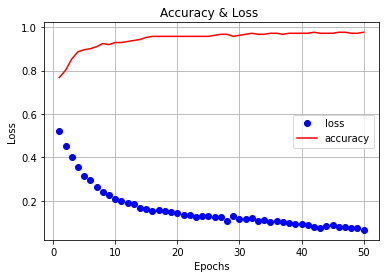

In [17]:
#Accuracy and loss represntation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='loss')
plt.plot(epochs, accuracy_values, 'r', label='accuracy')
plt.title('Accuracy & Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [18]:

network.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9857


[0.03866248205304146, 0.9857142567634583]

In [19]:
# model prediction
pred=network.predict(X_test)
pred.flatten().astype("U8")

array(['0.002284', '0.995999', '1.090904', '0.998803', '0.930471',
       '0.999355', '0.999232', '0.974458', '0.001084', '0.016348',
       '0.996403', '0.999223', '0.002067', '0.996526', '5.640578',
       '0.000195', '0.855148', '0.003994', '0.990028', '1.414806',
       '0.517896', '0.930476', '0.992973', '0.943197', '1.391408',
       '0.999199', '0.993284', '0.998585', '0.958598', '0.998799',
       '0.000737', '0.999087', '0.001098', '0.013642', '0.996629',
       '0.998546', '0.025815', '6.275341', '0.997891', '0.999821',
       '0.987053', '0.995813', '0.980099', '0.996459', '0.999376',
       '0.966663', '0.997881', '0.997166', '0.023130', '0.994649',
       '0.949344', '0.999619', '0.054092', '0.006296', '0.999065',
       '0.988819', '0.000896', '3.213706', '0.000996', '0.998108',
       '0.993964', '0.000595', '0.999198', '0.001188', '0.000163',
       '0.997714', '5.228224', '0.999440', '0.997688', '9.758409',
       '0.998654', '0.013182', '0.006773', '0.998983', '0.0078